# WEEK 3- Univariate and Bivariate Analysis

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Load dataset
df = pd.read_csv("preprocessed_kids_screen_time.csv")
df.head(7)

,Age,Age_group,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Device_Type,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Status,Urban_or_Rural
0,14,Teenagers,Male,3.99,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain","Mental, Physical",Urban
1,11,Pre-Teens,Female,4.61,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late Teens,Female,3.73,TV,Fixed,>=30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,Laptop,Portable,<30,False,0.39,No Health Impacts,No Health Impacts,Urban
4,12,Pre-Teens,Female,5.89,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban
5,14,Teenagers,Female,4.88,Smartphone,Portable,<30,True,0.44,Poor Sleep,Mental,Urban
6,17,Late Teens,Male,2.97,TV,Fixed,>=30,False,0.48,No Health Impacts,No Health Impacts,Rural


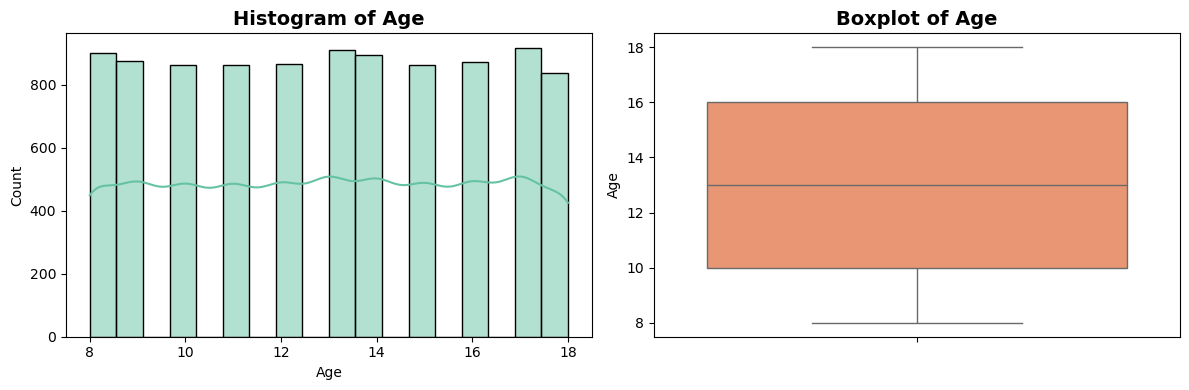

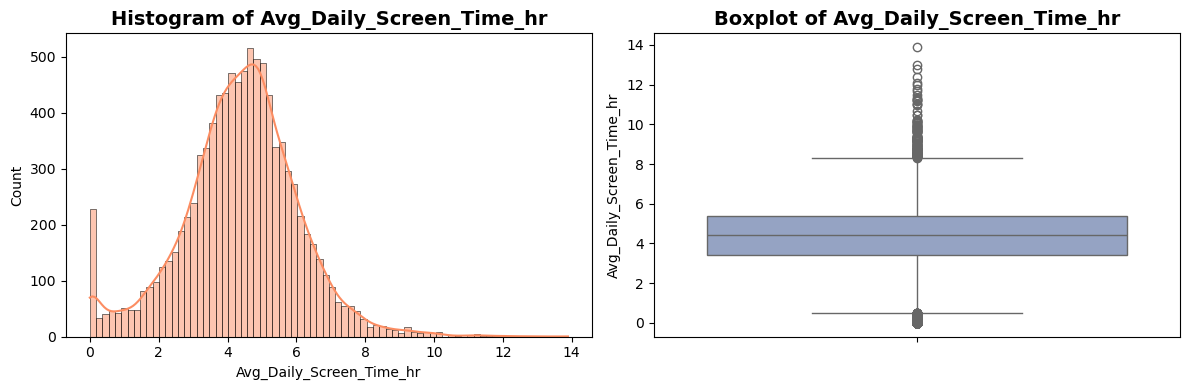

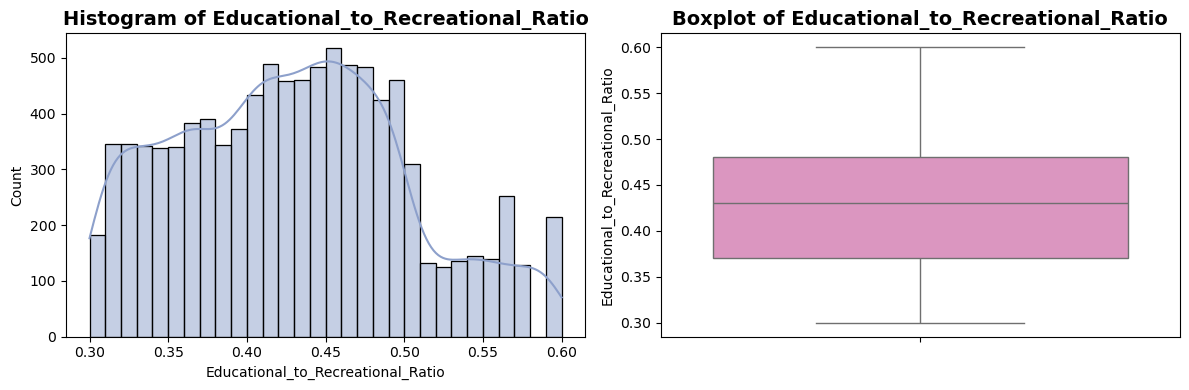

In [2]:
# Histograms & Boxplots (univariate)
palette = sns.color_palette("Set2")
num_cols = ["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]
for i, col in enumerate(num_cols):
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    
    # Histogram
    sns.histplot(df[col], kde=True, color=palette[i % len(palette)], ax=ax[0], edgecolor="black")
    ax[0].set_title(f"Histogram of {col}", fontsize=14, fontweight="bold")
    
    # Boxplot
    sns.boxplot(y=df[col], ax=ax[1], color=palette[(i+1) % len(palette)])
    ax[1].set_title(f"Boxplot of {col}", fontsize=14, fontweight="bold")
    
    plt.tight_layout()
    plt.show()

##  Insights

### 1. Age
- Histogram: Age evenly spread (8–18 yrs).  
- Boxplot: Median ≈ 13, no outliers.  
**Balanced sample across age groups.**

### 2. Avg_Daily_Screen_Time_hr
- Histogram: Right-skewed, most at 3–6 hrs, peak ~4 hrs.  
- Boxplot: Median ≈ 4, many outliers >8 hrs.  
**Majority exceed 2-hr limit; few extreme users.**

### 3. Educational_to_Recreational_Ratio
- Histogram: Centered ~0.45, mostly 0.35–0.50.  
- Boxplot: Median ~0.45, no strong outliers.  
**Recreation dominates screen use.**


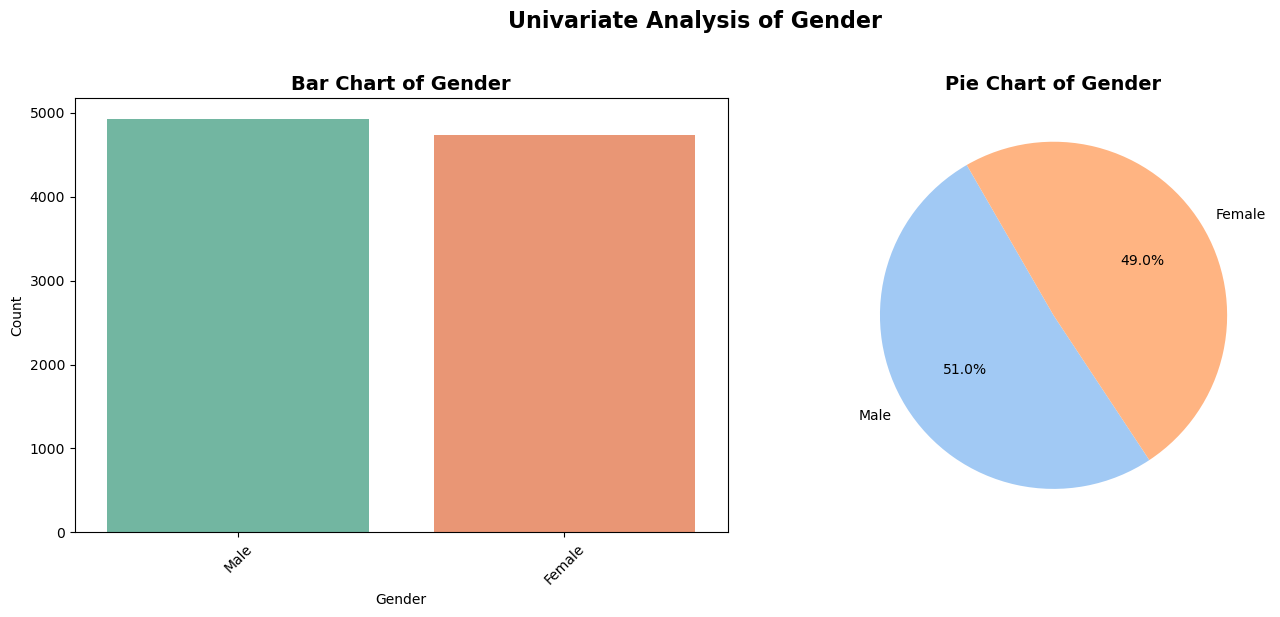

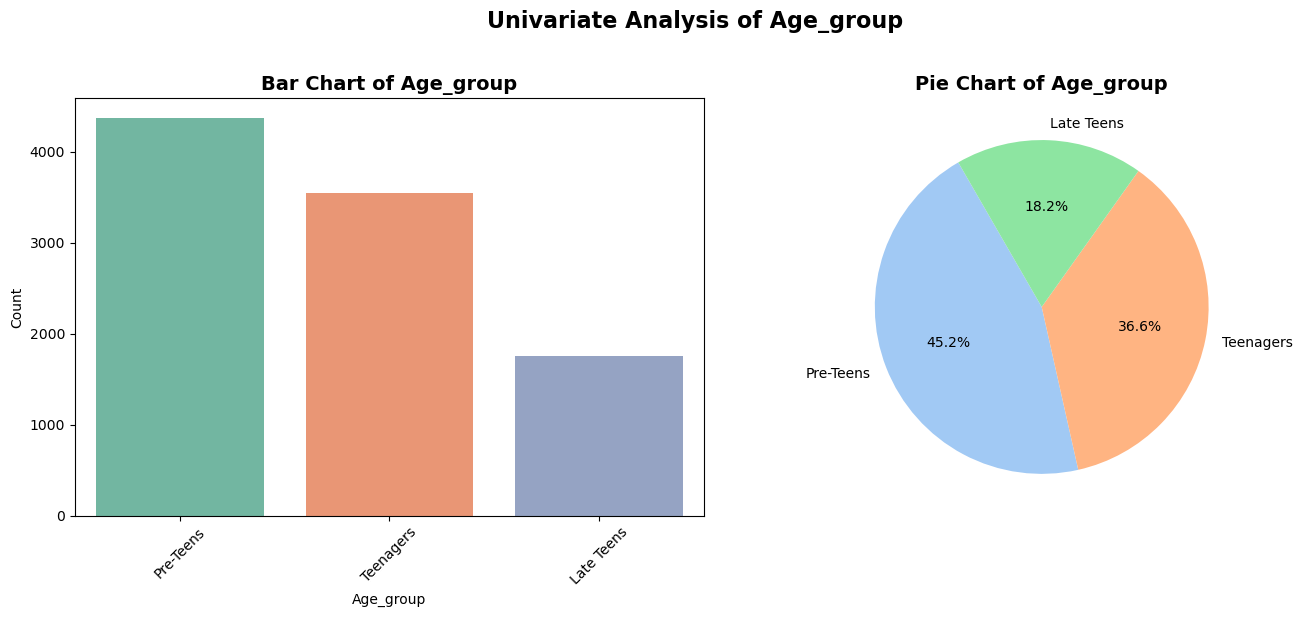

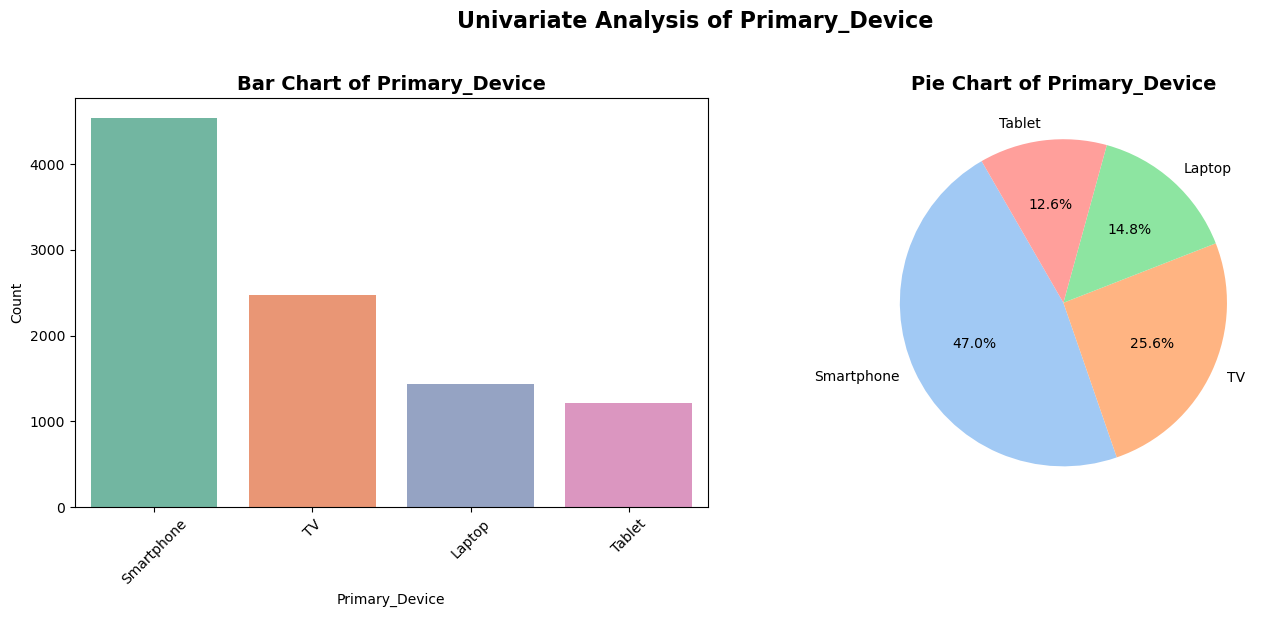

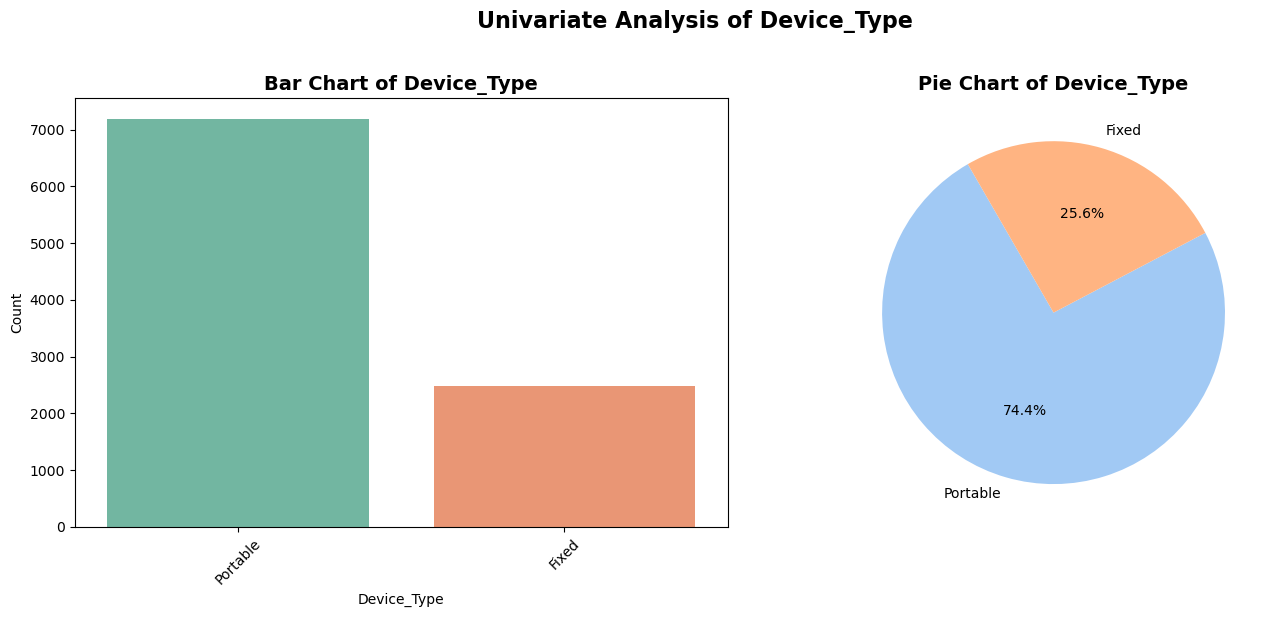

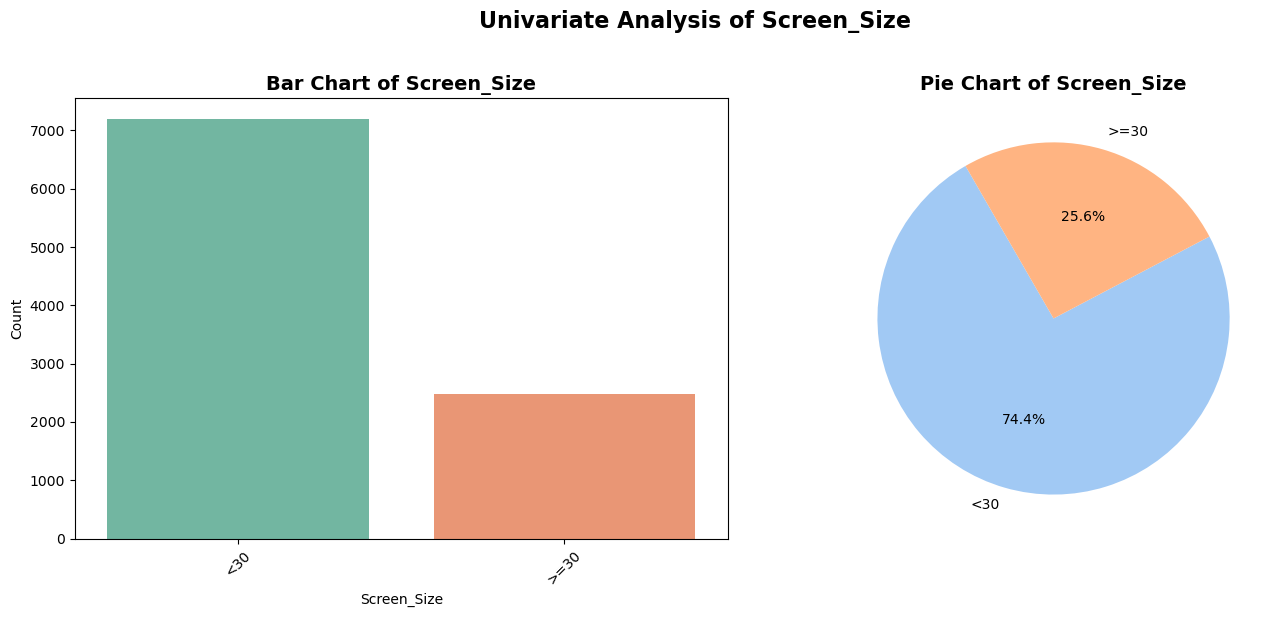

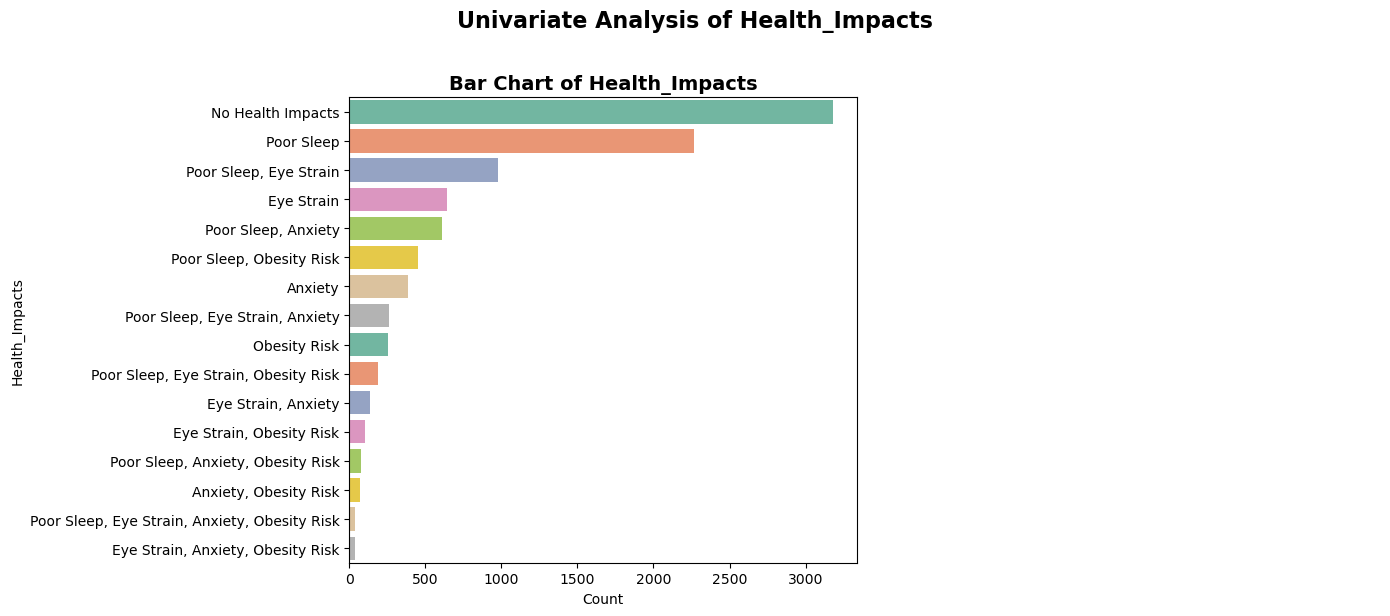

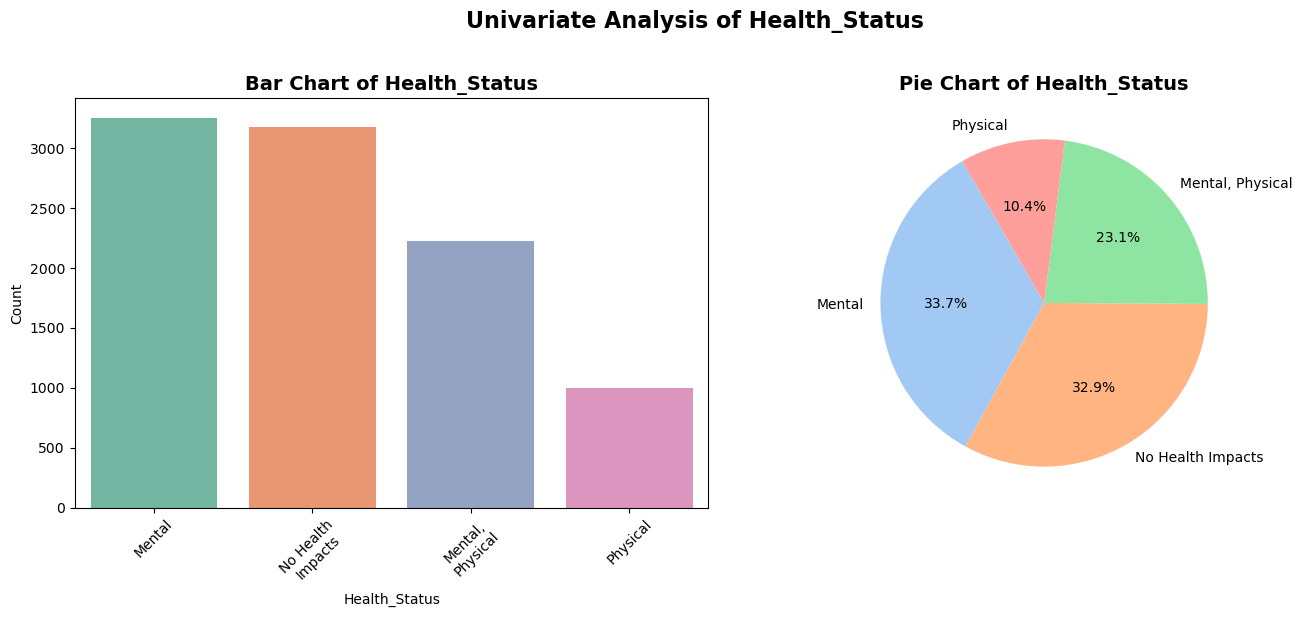

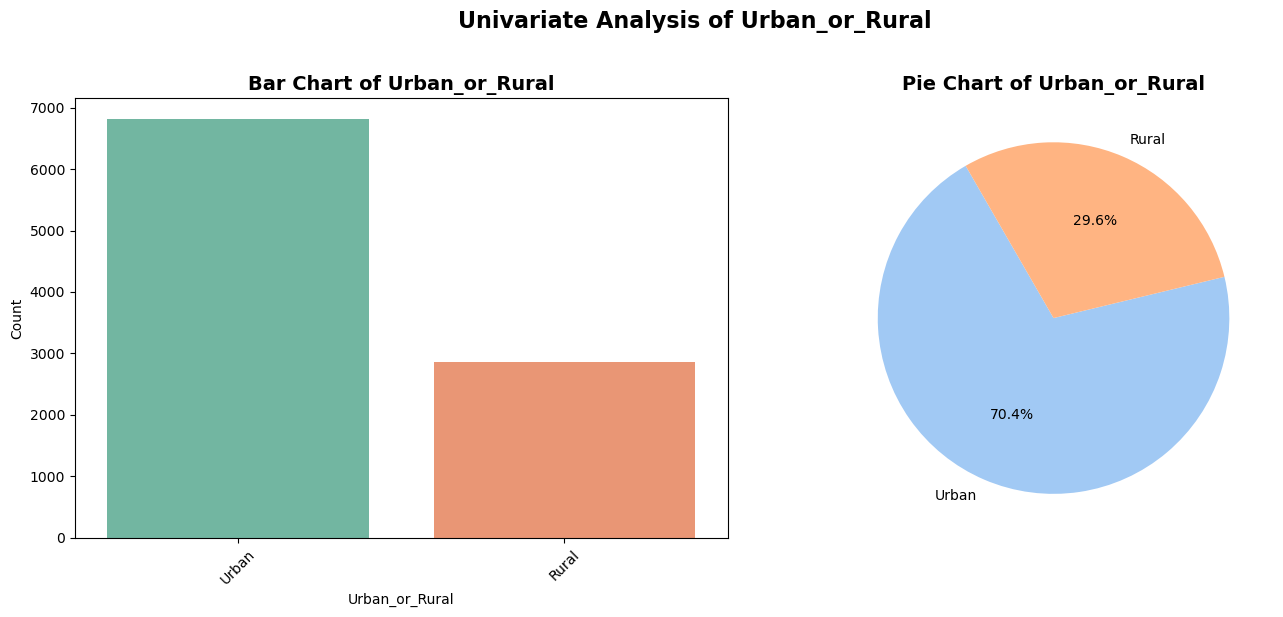

In [3]:
#bar chart and pie chart for categorical columns(univariate)
cat_cols = ["Gender", "Age_group", "Primary_Device", "Device_Type", 
            "Screen_Size", "Health_Impacts", "Health_Status", "Urban_or_Rural"]

for i, col in enumerate(cat_cols):
    vc = df[col].value_counts()

    fig, ax = plt.subplots(1, 2, figsize=(14,6))

    #Bar Chart
    if col == "Health_Impacts":
        # Horizontal bar for better readability
        sns.barplot(
            y=vc.index, x=vc.values, hue=vc.index,
            ax=ax[0], palette=sns.color_palette("Set2", len(vc)), legend=False
        )
        ax[0].set_xlabel("Count")
        ax[0].set_ylabel(col)
        ax[0].set_title(f"Bar Chart of {col}", fontsize=14, fontweight="bold")
    else:
        wrapped_labels = [textwrap.fill(label, 12) for label in vc.index]
        sns.barplot(
            x=wrapped_labels, y=vc.values, hue=wrapped_labels,
            ax=ax[0], palette=sns.color_palette("Set2", len(vc)), legend=False
        )
        ax[0].set_title(f"Bar Chart of {col}", fontsize=14, fontweight="bold")
        ax[0].set_ylabel("Count")
        ax[0].set_xlabel(col)
        ax[0].tick_params(axis="x", rotation=45)

    #Pie Chart
    if len(vc) <= 8:  
        ax[1].pie(vc, labels=vc.index, autopct='%1.1f%%',
                  colors=sns.color_palette("pastel", len(vc)), startangle=120)
        ax[1].set_title(f"Pie Chart of {col}", fontsize=14, fontweight="bold")
    else:
        ax[1].axis("off")  # no text, just empty

    plt.suptitle(f"Univariate Analysis of {col}", fontsize=16, fontweight="bold", y=1.02)
    plt.tight_layout()
    plt.show()

## Insights

### Gender  
- Male (**51%**) and Female (**49%**) → dataset is balanced.  

### Age Group  
- **Pre-teens (45%)** largest group.  
- Teenagers (**37%**) next, Late Teens (**18%**) least represented.  

### Primary Device  
- **Smartphone (47%)** dominates → mobile-first trend.  
- TV (**26%**) second, Laptop (**15%**), Tablet (**13%**) least common.  

### Device Type  
- **Portable devices (74%)** far more common than Fixed (**26%**).  

### Screen Size  
- Majority use **<30 cm screens (74%)**.  
- Only **26%** use ≥30 cm → compact screens preferred.  

### Health Impacts  
- Most report **No health issues**.  
- **Poor Sleep** and **Eye Strain** are the most frequent problems.  

### Health Status  
- **Mental health issues (34%)** slightly higher than **No Impacts (33%)**.  
- Mental+Physical (**23%**) and Physical only (**10%**) are less common.  

### Urban or Rural  
- **Urban users (70%)** dominate compared to Rural (**30%**).  

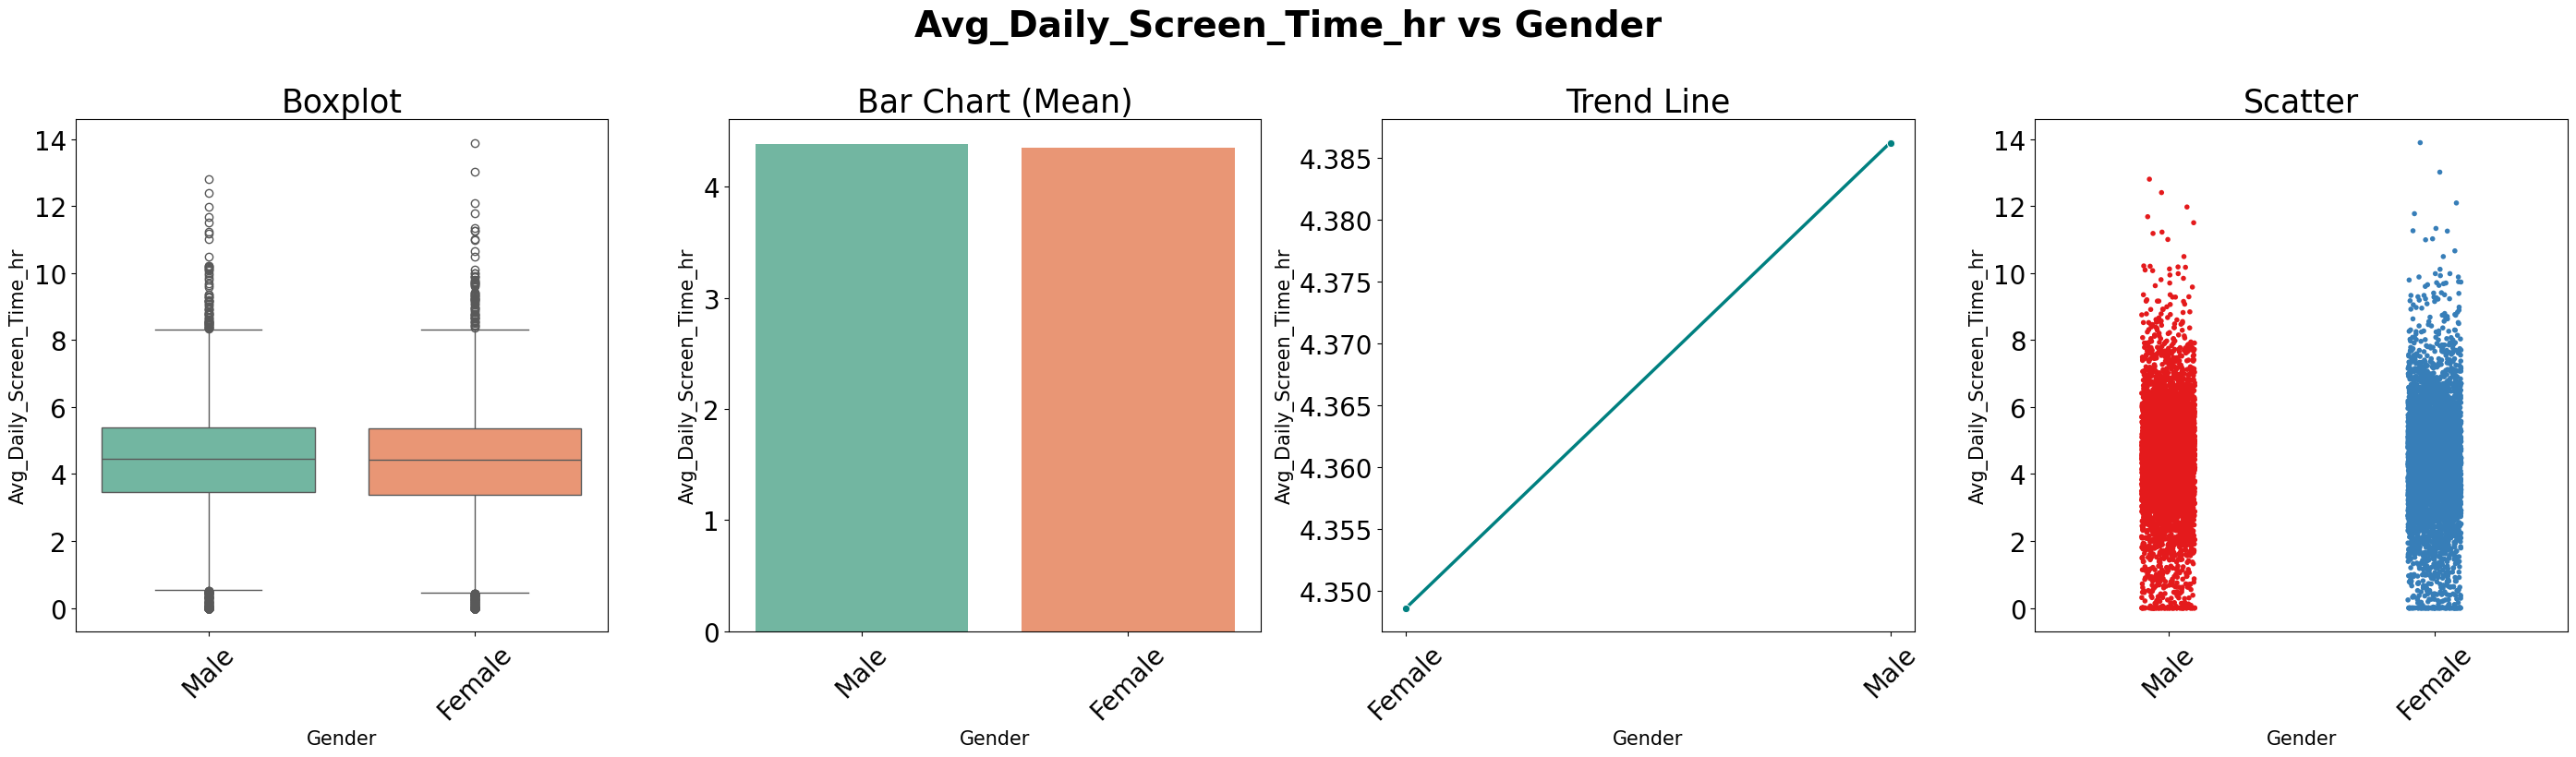

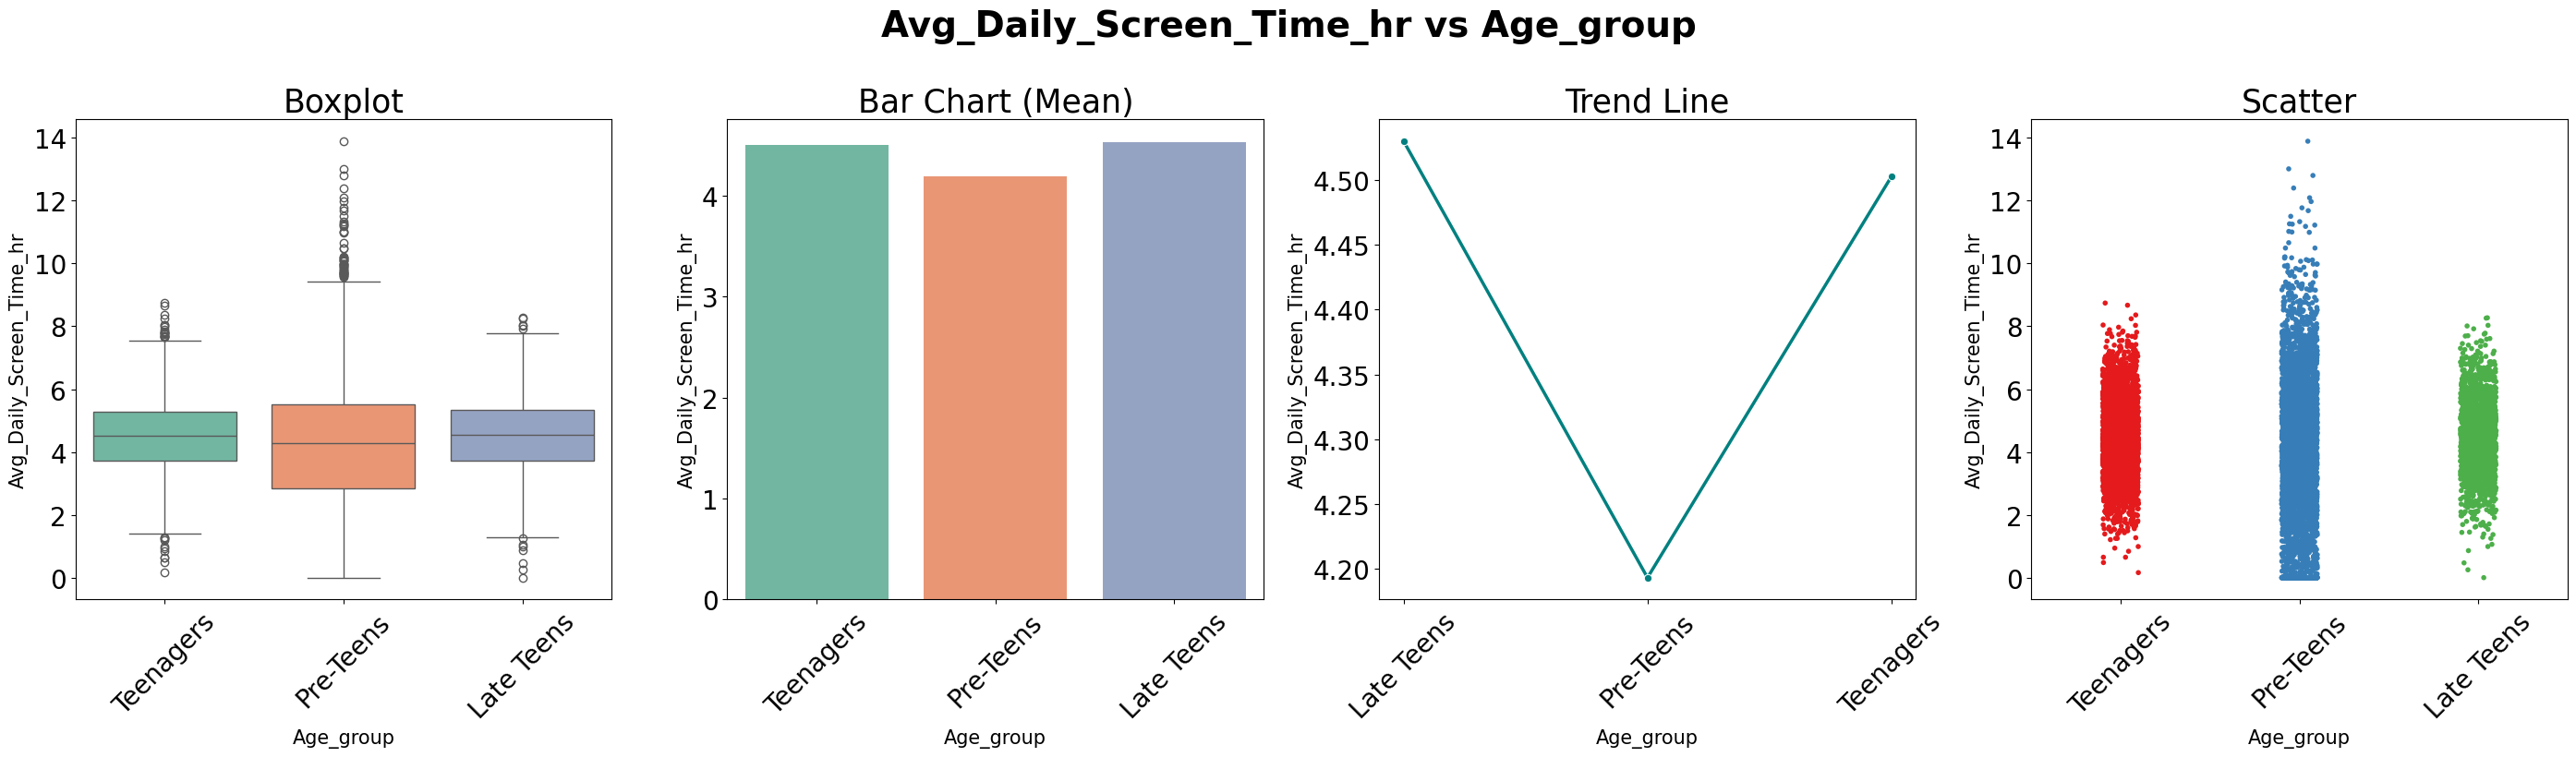

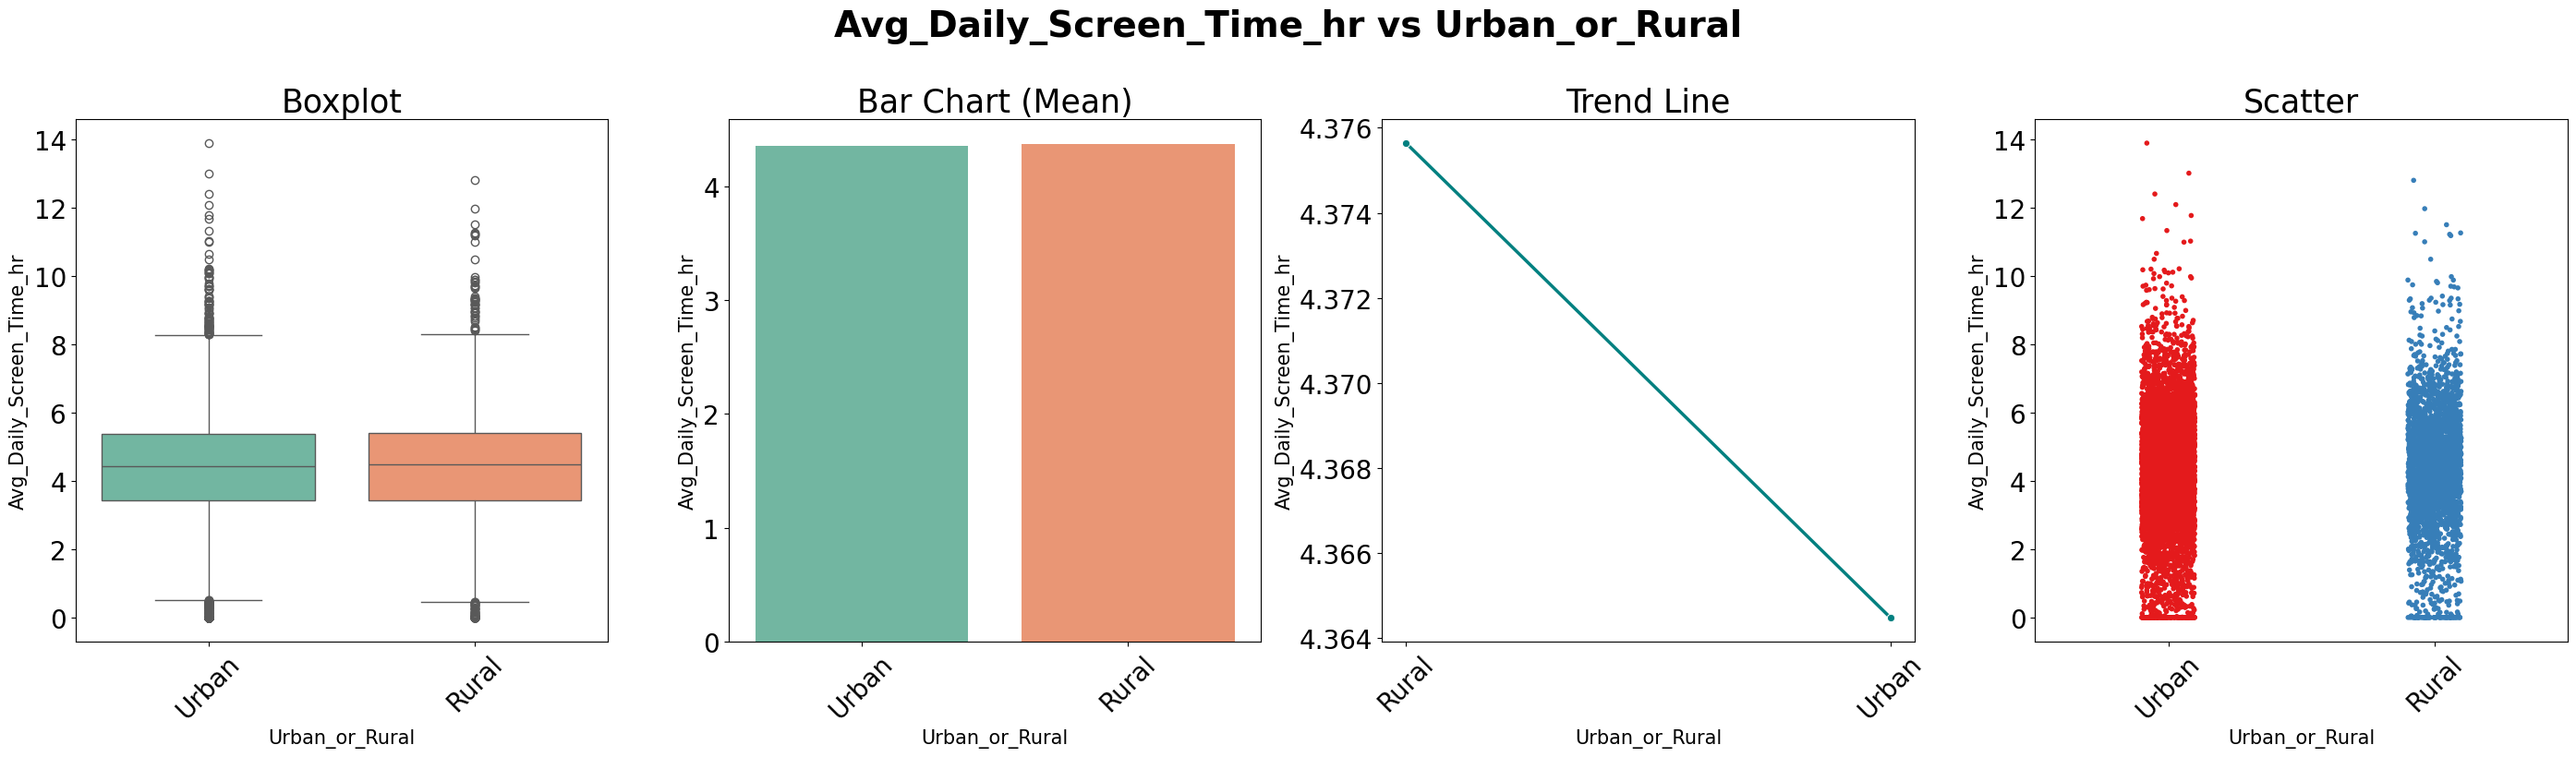

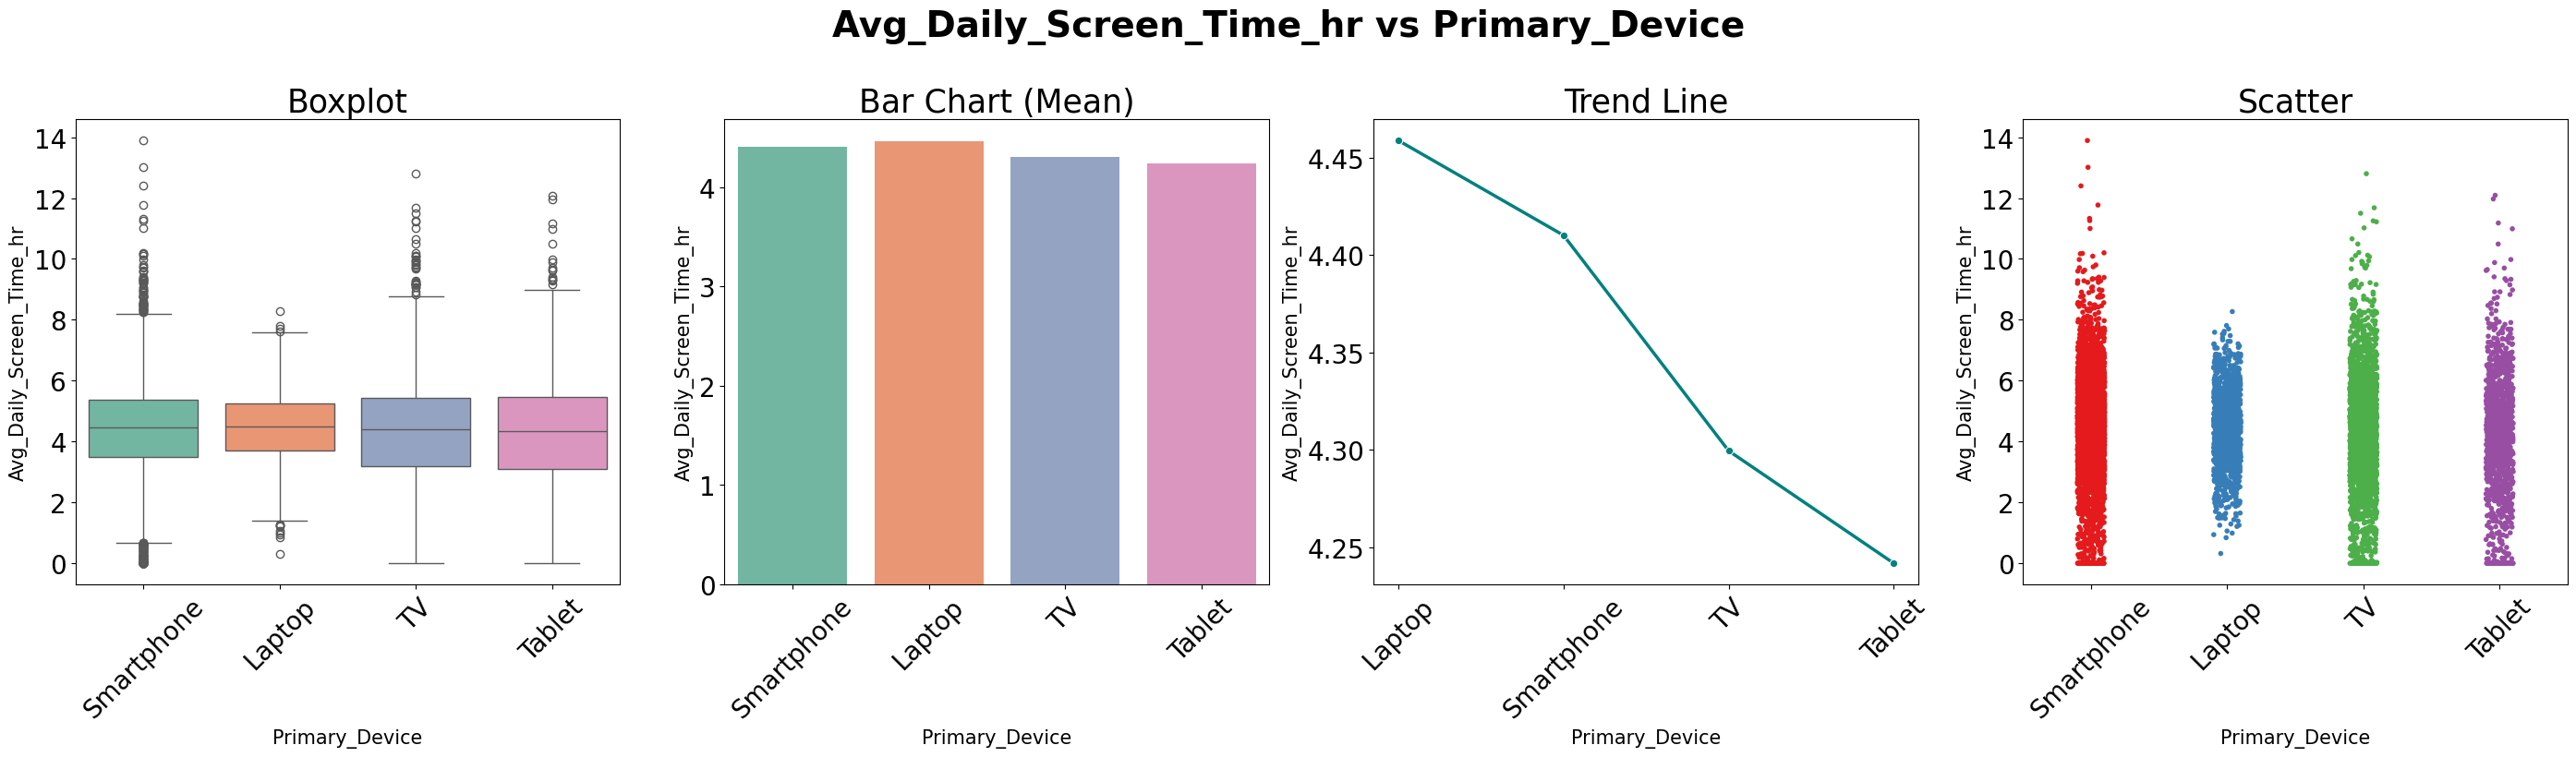

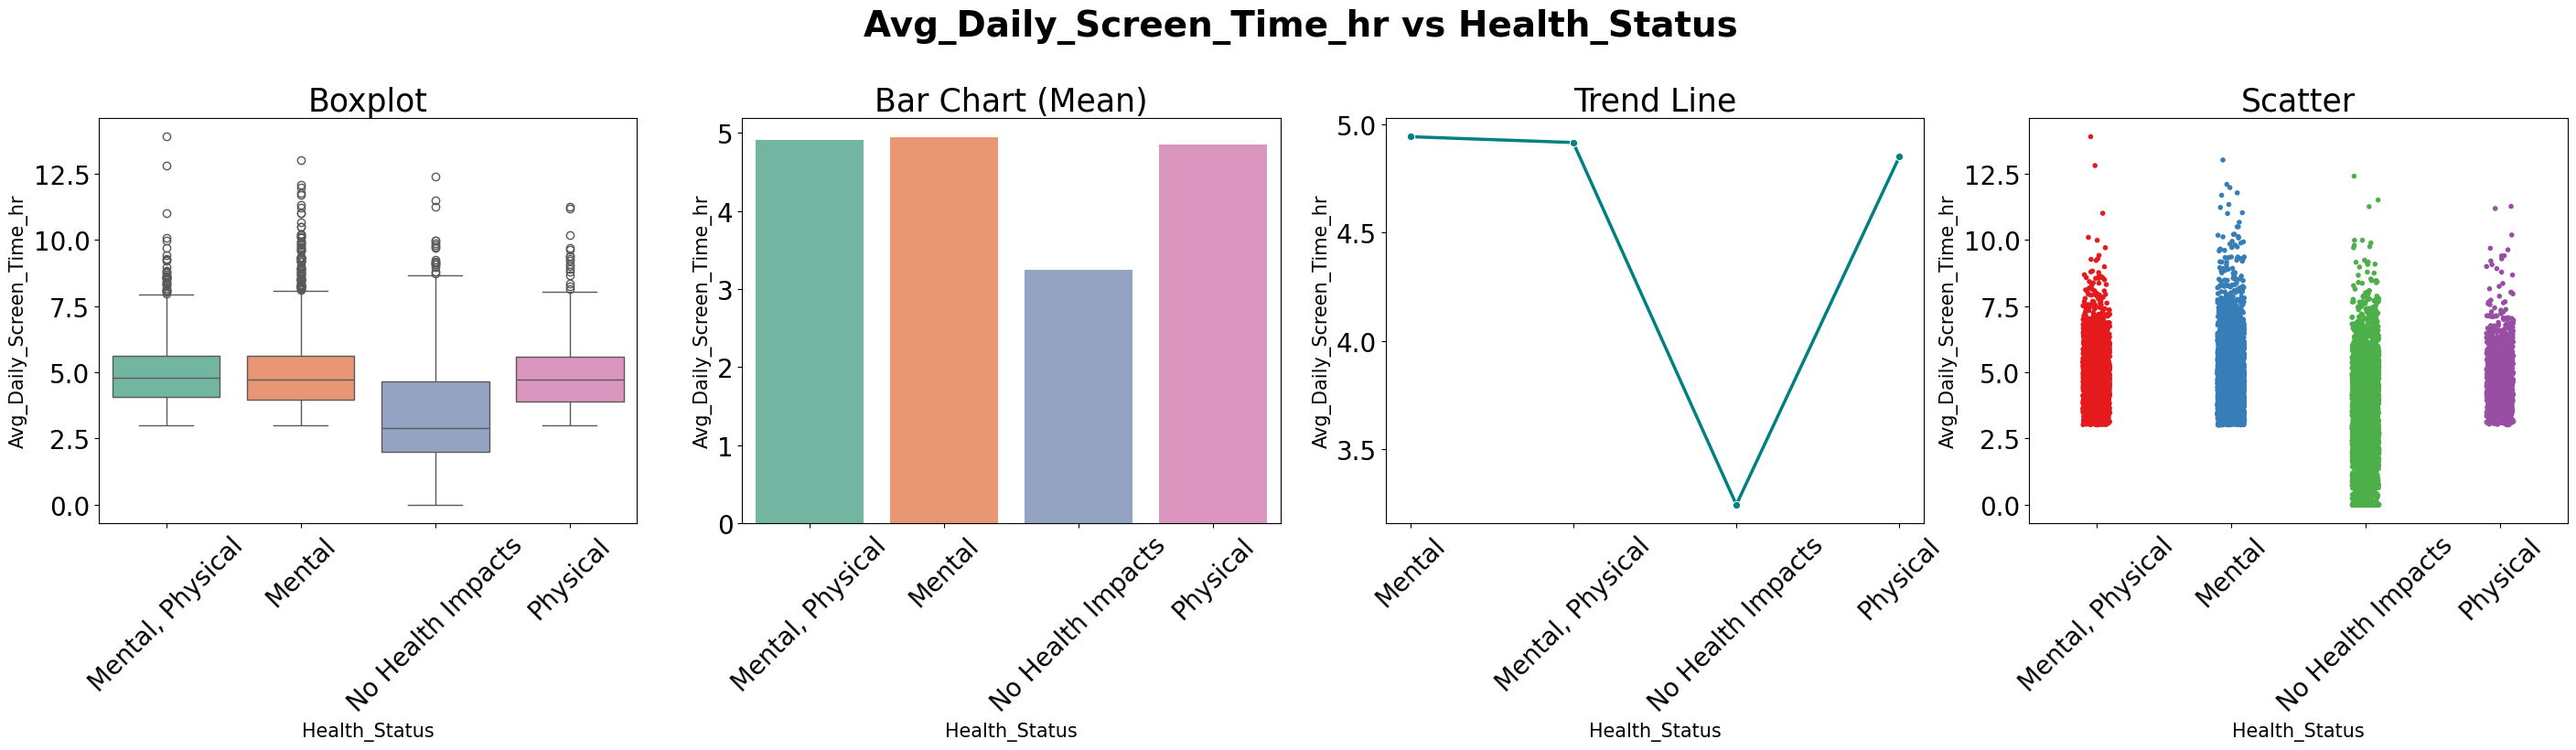

In [23]:
# Bivariate 
num_col = "Avg_Daily_Screen_Time_hr"
cat_cols = ["Gender", "Age_group", "Urban_or_Rural", "Primary_Device", "Health_Status"]

def plot_bivariate(num, cat):
    """Box, Bar, Line, Scatter side by side"""
    fig, axes = plt.subplots(1, 4, figsize=(28,8))

    # Global font settings
    plt.rcParams.update({
        "axes.titlesize": 25,       # subplot titles
        "axes.labelsize": 15,       # x/y labels
        "xtick.labelsize": 20,      # x tick labels
        "ytick.labelsize": 20       # y tick labels
    })

    # Boxplot
    sns.boxplot(x=cat, y=num, data=df, ax=axes[0],
                palette="Set2", hue=cat, legend=False)
    axes[0].set_title("Boxplot")
    axes[0].set_xlabel(cat)
    axes[0].set_ylabel(num)
    axes[0].tick_params(axis="x", rotation=45)

    # Barplot (mean)
    sns.barplot(x=cat, y=num, data=df, ax=axes[1],
                estimator="mean", errorbar=None,
                palette="Set2", hue=cat, legend=False)
    axes[1].set_title("Bar Chart (Mean)")
    axes[1].set_xlabel(cat)
    axes[1].set_ylabel(num)
    axes[1].tick_params(axis="x", rotation=45)

    # Lineplot (trend)
    mean_data = df.groupby(cat)[num].mean().reset_index()
    sns.lineplot(x=cat, y=num, data=mean_data,
                 marker="o", linewidth=2.5, color="teal", ax=axes[2])
    axes[2].set_title("Trend Line")
    axes[2].set_xlabel(cat)
    axes[2].set_ylabel(num)
    axes[2].tick_params(axis="x", rotation=45)

    # Scatter (stripplot)
    sns.stripplot(x=cat, y=num, data=df, ax=axes[3],
                  palette="Set1", hue=cat, legend=False, size=4, jitter=True)
    axes[3].set_title("Scatter")
    axes[3].set_xlabel(cat)
    axes[3].set_ylabel(num)
    axes[3].tick_params(axis="x", rotation=45)

    # Overall title
    plt.suptitle(f"{num} vs {cat}", fontsize=28, fontweight="bold", y=1.02)
    plt.tight_layout()
    plt.show()

# Run all categorical plots
for cat in cat_cols:
    plot_bivariate(num_col, cat)

### Insights

- **Gender**: Average screen time is almost the same for males and females, with males showing a slightly higher usage. Distribution spread is also very similar across genders.  

- **Age Group**: Late teenagers age groups spend the most time on screens, while Pre-teens groups show lower averages. The variation is wider among younger users, indicating some extremely high usage.  

- **Urban vs Rural**: Urban users tend to have higher daily screen time compared to rural users. Rural users show a smaller spread, while urban users include more heavy screen users.  

- **Primary Device**: Smartphone users have the highest average screen time and show more extreme outliers. Laptop users spend less time, and tablet device users record the lowest averages.  

- **Health Status**: Users reporting poor health spend more time on screens, while healthier individuals generally show lower screen usage. This indicates a possible link between excessive screen time and negative health outcomes.  


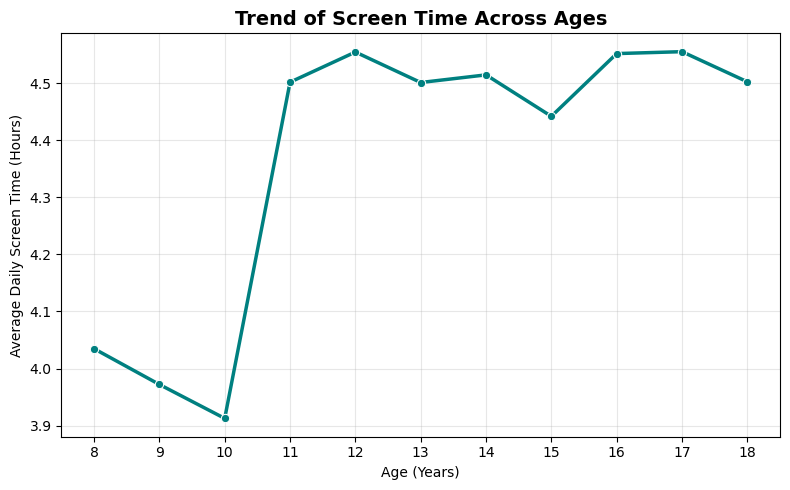

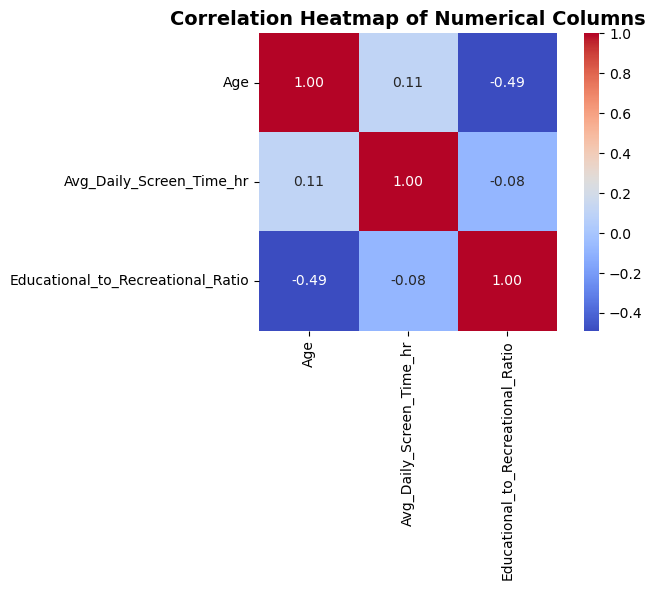

In [25]:
# Trend of Screen Time Across Ages(bivariate)
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="Age", y="Avg_Daily_Screen_Time_hr",
             marker="o", color="teal", linewidth=2.5, errorbar=None)
plt.title("Trend of Screen Time Across Ages", fontsize=14, weight="bold")
plt.xlabel("Age (Years)"); plt.ylabel("Average Daily Screen Time (Hours)")
plt.xticks(range(df["Age"].min(), df["Age"].max()+1))  
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df[["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Columns", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

### Insights

- **Trend of Screen Time Across Ages**:  
  - Screen time is relatively low till age 10, then rises sharply around age 11.  
  - From 12 to 18 years, average screen time remains consistently high (around 4.5+ hours).  
  - Suggests Late teenagers maintain higher screen engagement than Pre-teenagers.  

- **Correlation Heatmap**:  
  - **Age vs Screen Time** shows a very weak positive correlation (0.11) → older students use screens slightly more.  
  - **Age vs Educational-to-Recreational Ratio** is moderately negative (-0.49) → as age increases, recreational use dominates over educational use.  
  - **Screen Time vs Educational-to-Recreational Ratio** is almost negligible (-0.08) → total screen hours don’t strongly relate to how it’s divided between study and entertainment.  


# WEEK 3-Summary of Insights from Visualizations

### 1. Age Distribution & Screen Time
- The dataset contains children aged **8–18 years**, with most in the **11–15 range**.  
- Average daily screen time is around **4–5 hours**.  
- Older children (Late Teens) tend to have slightly higher screen time.  
- The **Educational-to-Recreational ratio decreases with age**, indicating older kids use devices more for entertainment than for learning.  

### 2. Gender Differences
- Male and Female participants are almost **evenly distributed (51% vs 49%)**.  
- Screen time patterns are **similar across genders**, with only small variations.  

### 3. Location (Urban vs Rural)
- Majority of the participants are from **Urban areas**.  
- **Urban children spend slightly more time** on screens compared to Rural children.  

### 4. Device Usage Patterns
- **Smartphones dominate (≈47%)**, followed by TV, Laptop, and Tablets.  
- **Portable devices (74%)** are used more than Fixed devices (26%).  
- Children using **portable devices show higher average screen time**.  

### 5. Screen Size
- **Smaller screens (<30 cm)** are used by around **75% of participants**.  
- Children with **smaller screens record higher screen time** compared to those with larger screens.  

### 6. Health Impacts
- The most common issues are **Poor Sleep** and **Eye Strain**.  
- Many children report **multiple health impacts** such as *Poor Sleep + Eye Strain + Anxiety*.  
- A group with **No Health Impacts** exists, but it is comparatively smaller.  

### 7. Correlation Insights
- **Age vs Educational/Recreational Ratio → Negative correlation (-0.49)**  
  → As age increases, educational usage decreases.  
- **Age vs Screen Time → Slight positive correlation (~0.11)**  
  → Older children spend more time on screens.  
- **Screen Time vs Educational Ratio → Very weak correlation (-0.08)**  

Overall, the analysis shows that **age, device type, and screen size strongly influence screen time and health impacts**.  
